In [1]:
%matplotlib inline
import quandl, math
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"



/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [24]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [2]:
CME_contracts =['SB','JO','LB','KC','CT','CC','RR','SI','PL','HG','GC','DA','PB','HE',
                'LC','FC','US','TY','TU','MB','FV','ED','YU','SP','RL','ND','MV','KV',
                'DJ','W','SM','S','O','MW','KW','C','BO','ITCO','RB','NG','HU','HO',
                'CL','SF','JY','EU','DX','CD','BP','AD']

In [3]:
map={'BO':'Soybean Oil',
'C':'Corn',
'CC':'CSCE-COCOA',
'CL':'NYM-LIGHT CRUDE OIL',
'CT':'Cotton',
'DA':'CME-MILK CLASS III GLOBEX',
'DX':'FINEX-US DOLLAR INDEX',
'ED':'CME-3 MTH EURODOLLAR COMP.',
'FC':'Feeder Cattle',
'FV':'CBT-5 YEAR US T-NOTE COMP.',
'GC':'CMX-GOLD 100 OZ',
'HG':'CMX-HIGH GRADE COPPER',
'KC':'CSCE-COFFEE \'C\'',
'KW':'KCBT-WHEAT',
'LB':'CME-LUMBER',
'LC':'CME-LIVE CATTLE COMP.',
'ND':'Nasdaq',
'NG':'NYM-NATURAL GAS',
'PL':'NYM-PLATINUM',
'RB':'RBOB Gasoline',
'RR':'CBT-ROUGH RICE',
'S':'CBT-SOYABEANS',
'SB':'CSCE-SUGAR #11',
'SF':'CME-SWISS FRANC COMP.',
'SI':'CMX-SILVER 5000 OZ',
'SM':'CBT-SOYABEAN MEAL',
'SP':'CME-MINI S&P 500 INDEX',
'TU':'CBT-2 YEAR US T-NOTE COMP.',
'TY':'CBT-10 YRS US T-NOTE COMP.',
'US':'CBT-30 YR US T-BOND COMP',
'W':'CBT-WHEAT C.01 DEA'}

In [20]:
contracts=['022651_F_L_ALL','86565D_F_L_ALL','032741_F_L_ALL','246605_F_L_ALL','043602_F_L_ALL','084602_F_L_ALL','041741_F_L_ALL','042661_F_L_ALL','042601_F_L_ALL','272741_F_L_ALL','02141C_F_L_ALL','390741_F_L_ALL','394741_F_L_ALL','597741_F_L_ALL','597742_F_L_ALL','132741_F_L_ALL','86565C_F_L_ALL','02165L_F_L_ALL','045741_F_L_ALL','045601_F_L_ALL','246606_F_L_ALL','044661_F_L_ALL','044662_F_L_ALL','044601_F_L_ALL','105741_F_L_ALL','271741_F_L_ALL','06439E_F_L_ALL','023396_F_L_ALL','06465K_F_L_ALL','06465O_F_L_ALL','0643EA_F_L_ALL','035650_F_L_ALL','023653_F_L_ALL','02339E_F_L_ALL','191691_F_L_ALL','191651_F_L_ALL','191693_F_L_ALL','120602_F_L_ALL','120741_F_L_ALL','253601_F_L_ALL','266741_F_L_ALL','066413_F_L_ALL','06742R_F_L_ALL','06665B_F_L_ALL','06665A_F_L_ALL','06742U_F_L_ALL','432661_F_L_ALL','332661_F_L_ALL','232741_F_L_ALL','232661_F_L_ALL','ADD_F_L_ALL','ADO_F_L_ALL','Z9_F_L_ALL','052733_F_L_ALL','133741_F_L_ALL','1330E1_F_L_ALL','00160F_F_L_ALL','221602_F_L_ALL','029642_F_L_ALL','029641_F_L_ALL','267741_F_L_ALL','102741_F_L_ALL','06765N_F_L_ALL','06765T_F_L_ALL','06765J_F_L_ALL','06765O_F_L_ALL','096741_F_L_ALL','096742_F_L_ALL','06641D_F_L_ALL','050642_F_L_ALL','050641_F_L_ALL','CY_F_L_ALL','DBO_F_L_ALL','0643BR_F_L_ALL','0643BM_F_L_ALL','064396_F_L_ALL','00639H_F_L_ALL','00639Y_F_L_ALL','0063A2_F_L_ALL','006391_F_L_ALL','006392_F_L_ALL','006393_F_L_ALL','249601_F_L_ALL','090741_F_L_ALL','067A49_F_L_ALL','006268_F_L_ALL','025601_F_L_ALL','024651_F_L_ALL','063731_F_L_ALL','063642_F_L_ALL','035651_F_L_ALL','02339Q_F_L_ALL','025651_F_L_ALL','023397_F_L_ALL','02365P_F_L_ALL','064A01_F_L_ALL','064A02_F_L_ALL','052644_F_L_ALL','252691_F_L_ALL','024656_F_L_ALL','024658_F_L_ALL','073732_F_L_ALL','083731_F_L_ALL','02339U_F_L_ALL','02339W_F_L_ALL','023A85_F_L_ALL','02339Y_F_L_ALL','06665T_F_L_ALL','085691_F_L_ALL','085692_F_L_ALL','002601_F_L_ALL','002631_F_L_ALL','033663_F_L_ALL','033661_F_L_ALL','218772_F_L_ALL','218771_F_L_ALL','06742G_F_L_ALL','067653_F_L_ALL','067651_F_L_ALL','067411_F_L_ALL','067652_F_L_ALL','024652_F_L_ALL','CFF_F_L_ALL','QLD_F_L_ALL','MCD_F_L_ALL','IOP_F_L_ALL','OY_F_L_ALL','EJ_F_L_ALL','IC1_F_L_ALL','ICE0_F_L_ALL','T1_F_L_ALL','T_F_L_ALL','QXB_F_L_ALL','094741_F_L_ALL','094743_F_L_ALL','094742_F_L_ALL','251601_F_L_ALL','12460P_F_L_ALL','294661_F_L_ALL','794661_F_L_ALL','0233A3_F_L_ALL','0233A2_F_L_ALL','02365N_F_L_ALL','124601_F_L_ALL','124603_F_L_ALL','270741_F_L_ALL','124606_F_L_ALL','052645_F_L_ALL','045L2T_F_L_ALL','06765G_F_L_ALL','BI_F_L_ALL','244741_F_L_ALL','244742_F_L_ALL','239742_F_L_ALL','33874A_F_L_ALL','13874A_F_L_ALL','138748_F_L_ALL','138749_F_L_ALL','13874C_F_L_ALL','13874E_F_L_ALL','13874I_F_L_ALL','13874J_F_L_ALL','067655_F_L_ALL','023655_F_L_ALL','02165I_F_L_ALL','0233A5_F_L_ALL','0233A6_F_L_ALL','0233A8_F_L_ALL','064651_F_L_ALL','064653_F_L_ALL','064654_F_L_ALL','064652_F_L_ALL','064655_F_L_ALL','239744_F_L_ALL','0643A8_F_L_ALL','06439N_F_L_ALL','0643A7_F_L_ALL','0643A5_F_L_ALL','064IAN_F_L_ALL','06439R_F_L_ALL','066416_F_L_ALL','025608_F_L_ALL','02165C_F_L_ALL','02165E_F_L_ALL','099741_F_L_ALL','299741_F_L_ALL','399741_F_L_ALL','299661_F_L_ALL','799661_F_L_ALL','194741_F_L_ALL','196741_F_L_ALL','197741_F_L_ALL','499661_F_L_ALL','399661_F_L_ALL','116661_F_L_ALL','967654_F_L_ALL','099661_F_L_ALL','03265A_F_L_ALL','EW_F_L_ALL','SMJ_F_L_ALL','SNJ_F_L_ALL','UF1_F_L_ALL','869652_F_L_ALL','869654_F_L_ALL','061641_F_L_ALL','048741_F_L_ALL','091741_F_L_ALL','091811_F_L_ALL','594661_F_L_ALL','070642_F_L_ALL','056642_F_L_ALL','040701_F_L_ALL','056641_F_L_ALL','02165H_F_L_ALL','021A56_F_L_ALL','FI_F_L_ALL','022A24_F_L_ALL','02265V_F_L_ALL','86765C_F_L_ALL','111659_F_L_ALL','062601_F_L_ALL','06260E_F_L_ALL','088741_F_L_ALL','088691_F_L_ALL','088604_F_L_ALL','088606_F_L_ALL','256741_F_L_ALL','060611_F_L_ALL','022A60_F_L_ALL','02165A_F_L_ALL','86565A_F_L_ALL','02165R_F_L_ALL','26265A_F_L_ALL','022A09_F_L_ALL','022A05_F_L_ALL','111A31_F_L_ALL','86465A_F_L_ALL','021A28_F_L_ALL','86565N_F_L_ALL','GLI_F_L_ALL','GZ_F_L_ALL','MG_F_L_ALL','GE1_F_L_ALL','LY_F_L_ALL','GCI_F_L_ALL','001623_F_L_ALL','86765A_F_L_ALL','0233AG_F_L_ALL','0233AH_F_L_ALL','035652_F_L_ALL','023A09_F_L_ALL','023A55_F_L_ALL','023P01_F_L_ALL','023A56_F_L_ALL','03565C_F_L_ALL','03565B_F_L_ALL','023P02_F_L_ALL','023P03_F_L_ALL','238621_F_L_ALL','223771_F_L_ALL','192651_F_L_ALL','035653_F_L_ALL','0233AM_F_L_ALL','023A10_F_L_ALL','023398_F_L_ALL','API_F_L_ALL','HB_F_L_ALL','NH_F_L_ALL','006GEC_F_L_ALL','137611_F_L_ALL',
           '114601_F_L_ALL','195651_F_L_ALL']


contract_map={'195651_F_L_ALL':'IRON ORE 62% FE-CFR CHINA TSI (NYME)','114601_F_L_ALL':'IOWA CORN YIELD INSURANCE (CBT)','137611_F_L_ALL':'INTERNET STOCK INDEX (KCBT)','006GEC_F_L_ALL':'IN DELIVERY MONTH EUA (GE)','NH_F_L_ALL':'Houston Ship Ch B','HB_F_L_ALL':'Henry Hub B','API_F_L_ALL':'Henry Hub - Tailgate, Louisian','023398_F_L_ALL':'HSC FIN BASIS (IFED)','023A10_F_L_ALL':'HOUSTON SHP CHANNEL INDEX SWAP (NYME)','0233AM_F_L_ALL':'HOUSTON SHIP CHANNEL (INDEX) (IFED)','035653_F_L_ALL':'HOUSTON SHIP CH BASIS SWAP (NYME)','192651_F_L_ALL':'HOT ROLLED COIL STEEL (NYME)','223771_F_L_ALL':'HIGH TECHNOLOGY INDEX (NYFE)','238621_F_L_ALL':'HIGH FRUCTOSE CORN SYRUP, 55% (MGE)','023P03_F_L_ALL':'HHUB NAT GAS PENULT FINL-2500 (PBOT)','023P02_F_L_ALL':'HHUB NAT GAS PENULT FINL-10000 (PBOT)','03565B_F_L_ALL':'HENRY HUB SWAP (NYME)','03565C_F_L_ALL':'HENRY HUB PENULTIMATE GAS SWAP (NYME)','023A56_F_L_ALL':'HENRY HUB PENULTIMATE FIN (NYME)','023P01_F_L_ALL':'HENRY HUB NAT GAS FINL-10000 (PBOT)','023A55_F_L_ALL':'HENRY HUB LAST DAY FIN (NYME)','023A09_F_L_ALL':'HENRY HUB INDEX SWAP (NYME)','035652_F_L_ALL':'HENRY HUB BASIS SWAP (NYME)','0233AH_F_L_ALL':'HENRY HUB - TAILGATE LOUISIANA (INDEX) (IFED)','0233AG_F_L_ALL':'HENRY HUB - TAILGATE LOUISIANA (BASIS) (IFED)','86765A_F_L_ALL':'HEAT OIL CRACK SPRD CAL SWAP (NYME)','001623_F_L_ALL':'HARD AMBER DURUM WHEAT (MGE)','GCI_F_L_ALL':'Gulf#6 Fueloil Brent ','LY_F_L_ALL':'Gulf Coast Ulsd Crack','GE1_F_L_ALL':'Gulf Coast Jet Fuel','MG_F_L_ALL':'Gulf # 6 Fuel Oil C','GZ_F_L_ALL':'Gasoil Crack','GLI_F_L_ALL':'Gasoil (','86565N_F_L_ALL':'GULF#6 FUELOIL BRENT CRACK SWP (NYME)','021A28_F_L_ALL':'GULF NO6 FO 3% v EUR 3.5% RDAM (NYME)','86465A_F_L_ALL':'GULF JET NY HEAT OIL SPR SWAP (NYME)','111A31_F_L_ALL':'GULF COAST UNL 87 GAS M2 PL RB (NYME)','022A05_F_L_ALL':'GULF COAST ULSD SWAP (NYME)','022A09_F_L_ALL':'GULF COAST ULSD CRACK SPR SWAP (NYME)','26265A_F_L_ALL':'GULF COAST JET FUEL CAL SWAP (NYME)','02165R_F_L_ALL':'GULF 3% FUEL OIL BALMO SWAP (NYME)','86565A_F_L_ALL':'GULF # 6 FUEL OIL CRACK SWAP (NYME)','02165A_F_L_ALL':'GULF # 6 FUEL 3.0% SULFUR SWAP (NYME)','022A60_F_L_ALL':'GRP 3 ULSD VS HEATING OIL SPR (NYME)','060611_F_L_ALL':'GRAIN SORGHUMS (KCBT)','256741_F_L_ALL':'GOLDMAN-SACHS COMMODITY INDEX (CME)','088606_F_L_ALL':'GOLD, 100 TROY OZ (CBT)','088604_F_L_ALL':'GOLD, 100 TROY OZ (CBT)','088691_F_L_ALL':'GOLD (CMX)','088741_F_L_ALL':'GOLD (CME)','06260E_F_L_ALL':'GNMA 9 1/2 % (CBT)','062601_F_L_ALL':'GNMA (MORTGAGES) CDR (CBT)','111659_F_L_ALL':'GASOLINE BLENDSTOCK (RBOB) (NYME)','86765C_F_L_ALL':'GASOIL CRACK SPR SWAP (NYME)','02265V_F_L_ALL':'GASOIL (ICE) SWAP (NYME)','022A24_F_L_ALL':'GASOIL (ICE) MINI CAL SWAP (NYME)','FI_F_L_ALL':'Fuel Oil Cargoes B Pl','021A56_F_L_ALL':'FUEL OIL-380cst SING/3.5% RDAM (NYME)','02165H_F_L_ALL':'FUEL OIL CARGOES B PLATTS SWAP (NYME)','056641_F_L_ALL':'FRZN PORK BELLIES (CME)','040701_F_L_ALL':'FRZN CONCENTRATED ORANGE JUICE (ICUS)','056642_F_L_ALL':'FRESH PORK BELLIES (CME)','070642_F_L_ALL':'FRESH BROILERS (CME)','594661_F_L_ALL':'FRENCH FRANC/DMARK XRATE (NYCE)','091811_F_L_ALL':'FRENCH FRANC (PBT)','091741_F_L_ALL':'FRENCH FRANC (CME)','048741_F_L_ALL':'FIVE-YEAR AGENCY NOTE (CME)','061641_F_L_ALL':'FEEDER CATTLE (CME)','869654_F_L_ALL':'FAME BIODIESEL V GASOIL SPR SP (NYME)','869652_F_L_ALL':'FAM BIODIESEL V GASOIL SPR SWP (NYME)','UF1_F_L_ALL':'Eur 1% Fuel Oil Nwe','SNJ_F_L_ALL':'El Paso-san Juan Basin,blanco Pool Primar','SMJ_F_L_ALL':'El Paso-san Juan Basin,blanco Pool Primar','EW_F_L_ALL':'East West Fuel Oil','03265A_F_L_ALL':'EUROPEAN NAPHTHA CAL SWAP (NYME)','099661_F_L_ALL':'EUROPEAN CURRENCY UNIT (NYCE)','967654_F_L_ALL':'EUROBOB OXY NWE CRK SPR (NYME)','116661_F_L_ALL':'EURO/US DOLLAR (NYCE)','399661_F_L_ALL':'EURO/SWEDISH KRONA XRATE (NYCE)','499661_F_L_ALL':'EURO/SFRANK CROSSRATE (NYCE)','197741_F_L_ALL':'EURO-YEN RATE DIFFERENTIAL (CME)','196741_F_L_ALL':'EURO-POUND RATE DIFFERENTIAL (CME)','194741_F_L_ALL':'EURO-MARK RATE DIFFERENTIAL (CME)','799661_F_L_ALL':'EURO NORWEGIAN KRONE XRATE (NYCE)','299661_F_L_ALL':'EURO FX/JAPANESE YEN XRATE (NYBT)','399741_F_L_ALL':'EURO FX/JAPANESE YEN XRATE (CME)','299741_F_L_ALL':'EURO FX/BRITISH POUND XRATE (CME)','099741_F_L_ALL':'EURO FX (CME)','02165E_F_L_ALL':'EUR 3.5% FUEL OIL RTD CAL SWAP (NYME)','02165C_F_L_ALL':'EUR 1% FUEL OIL NWE CAL SWAP (NYME)','025608_F_L_ALL':'ETHANOL T2 FOB INCL DUTY SWAP (NYME)','066416_F_L_ALL':'ETHANE, MT. BELV-ENTERPRISE (IFED)','06439R_F_L_ALL':'ERCOT NORTH 345KV RT PK FIX (IFED)','064IAN_F_L_ALL':'ERCOT NORTH 345KV REAL-TIME PK (IFED)','0643A5_F_L_ALL':'ERCOT NORTH 345KV DA PEAK (IFED)','0643A7_F_L_ALL':'ERCOT NORTH 345K RT OFFPK DLY (IFED)','06439N_F_L_ALL':'ERCOT HOUSTON 345KV RT PK FIX (IFED)','0643A8_F_L_ALL':'ERCOT - NORTH MONTHLY OFF-PEAK (IFED)','239744_F_L_ALL':'EMINI RUSSELL 1000 VALUE INDEX (CME)','064655_F_L_ALL':'ELECTRICITY (PJM) (NYME)','064652_F_L_ALL':'ELECTRICITY (PALO VERDE) (NYME)','064654_F_L_ALL':'ELECTRICITY (ENTERGY) (NYME)','064653_F_L_ALL':'ELECTRICITY (CINERGY) (NYME)','064651_F_L_ALL':'ELECTRICITY (CA-OR BORDER) (NYME)','0233A8_F_L_ALL':'EL PASO-SAN JUAN BASIN-BLANCO POOL PRIMARY ONLY-BASIS (IFED)','0233A6_F_L_ALL':'EL PASO - PERMIAN BASIN (INDEX) (IFED)','0233A5_F_L_ALL':'EL PASO - PERMIAN BASIN (BASIS) (IFED)','02165I_F_L_ALL':'EAST WEST FUEL OIL SPR SWAP (NYME)','023655_F_L_ALL':'E-MINY NATURAL GAS (NYME)','067655_F_L_ALL':'E-MINY CRUDE OIL, LIGHT SWEET (NYME)','13874J_F_L_ALL':'E-MINI S&P UTILITIES INDEX (CME)','13874I_F_L_ALL':'E-MINI S&P TECHNOLOGY INDEX (CME)','13874E_F_L_ALL':'E-MINI S&P HEALTH CARE INDEX (CME)','13874C_F_L_ALL':'E-MINI S&P FINANCIAL INDEX (CME)','138749_F_L_ALL':'E-MINI S&P ENERGY INDEX (CME)','138748_F_L_ALL':'E-MINI S&P CONSU STAPLES INDEX (CME)','13874A_F_L_ALL':'E-MINI S&P 500 STOCK INDEX (CME)','33874A_F_L_ALL':'E-MINI S&P 400 STOCK INDEX (CME)','239742_F_L_ALL':'E-MINI RUSSELL 2000 INDEX (CME)','244742_F_L_ALL':'E-MINI MSCI EMERGING MARKETS (CME)','244741_F_L_ALL':'E-MINI MSCI EAFE (CME)','BI_F_L_ALL':'Dubai Crude Oil Cale','06765G_F_L_ALL':'DUBAI CRUDE OIL CALENDAR SWAP (NYME)','045L2T_F_L_ALL':'DTCC Repo-US Treasury <30 YR - NYSE LIFFE (NYL2)','052645_F_L_ALL':'DRY WHEY (CME)','124606_F_L_ALL':'DOW JONES U.S. REAL ESTATE IDX (CBT)','270741_F_L_ALL':'DOW JONES TAIWAN STOCK INDEX (CME)','124603_F_L_ALL':'DOW JONES INDUSTRIAL AVG- x $5 (CBT)','124601_F_L_ALL':'DOW JONES INDUSTRIAL AVERAGE (CBT)','02365N_F_L_ALL':'DOMINION BASIS SWAP (NYME)','0233A2_F_L_ALL':'DOMINION - SOUTH POINT (IFED)','0233A3_F_L_ALL':'DOMINION - SOUTH POINT (BASIS) (IFED)','794661_F_L_ALL':'DMARK/SPANISH PESETA XRATE (NYCE)','294661_F_L_ALL':'DMARK/POUND CROSSRATE (NYCE)','12460P_F_L_ALL':'DJIA Consolidated (CBT)','251601_F_L_ALL':'DIAMMONIUM PHOSPHATE (CBT)','094742_F_L_ALL':'DEUTSCHE MARK, ROLLING SPOT (CME)','094743_F_L_ALL':'DEUTSCHE MARK, FORWARD (CME)','094741_F_L_ALL':'DEUTSCHE MARK (CME)','QXB_F_L_ALL':'Csx ','T_F_L_ALL':'Crude Oil, Li','T1_F_L_ALL':'Crude Oil, Li','ICE0_F_L_ALL':'Columbia Gulf Transmission Co. - Main','IC1_F_L_ALL':'Columbia Gas Co. - Tco Pool (appalachia','EJ_F_L_ALL':'Cinergy Off Peak','OY_F_L_ALL':'Cinergy Cal Month','IOP_F_L_ALL':'Cin Hub Real Time','MCD_F_L_ALL':'Cin Hub Da','QLD_F_L_ALL':'Central Appalac','CFF_F_L_ALL':'Carbon Financial I','024652_F_L_ALL':'CSX COAL SWAP (NYME)','067652_F_L_ALL':'CRUDE OIL, SOUR (NYME)','067411_F_L_ALL':'CRUDE OIL, LIGHT SWEET-WTI (ICEU)','067651_F_L_ALL':'CRUDE OIL, LIGHT SWEET (NYME)','067653_F_L_ALL':'CRUDE OIL, BRENT (NYME)','06742G_F_L_ALL':'CRUDE DIFF-TMX WCS 1A INDEX (IFED)','218771_F_L_ALL':'CRB/BRIDGE INDEX (NYFE)','218772_F_L_ALL':'CRB FUTURES PRICE INDEX (NYFE)','033661_F_L_ALL':'COTTON NO. 2 (ICUS)','033663_F_L_ALL':'COTLOOK WORLD COTTON (NYCE)','002631_F_L_ALL':'CORN (MCE)','002601_F_L_ALL':'CORN (CBT)','085692_F_L_ALL':'COPPER-GRADE #1 (CMX)','085691_F_L_ALL':'COPPER (CMX)','06665T_F_L_ALL':'CONWAY PROPANE (OPIS) (NYME)','02339Y_F_L_ALL':'COLUMBIA GULF TRANSMISSION CO. - MAINLINE POOL (IFED)','023A85_F_L_ALL':'COLUMBIA GULF ML SWAP (NYME)','02339W_F_L_ALL':'COLUMBIA GAS CO. - TCO POOL (APPALACHIA) (BASIS) (IFED)','02339U_F_L_ALL':'COLORADO INTERSTATE - MAINLINE (BASIS) (IFED)','083731_F_L_ALL':'COFFEE C (ICUS)','073732_F_L_ALL':'COCOA (ICUS)','024658_F_L_ALL':'COAL (API 4) FOB RICH BAY FUT (NYME)','024656_F_L_ALL':'COAL (API 2) CIF ARA SWAP FUT (NYME)','252691_F_L_ALL':'CMX MOODY CORPORATE BOND INDEX (CMX)','052644_F_L_ALL':'CME MILK IV (CME)','064A02_F_L_ALL':'CINERGY OFF PEAK LMP SWAP (NYME)','064A01_F_L_ALL':'CINERGY CAL MONTH LMP SWAP (NYME)','02365P_F_L_ALL':'CIG BASIS SWAP (NYME)','023397_F_L_ALL':'CHICAGO FIN BASIS (IFED)','025651_F_L_ALL':'CHICAGO ETHANOL SWAP (NYME)','02339Q_F_L_ALL':'CHICAGO CITYGATE (INDEX) (IFED)','035651_F_L_ALL':'CHICAGO BASIS SWAP (NYME)','063642_F_L_ALL':'CHEESE (CASH-SETTLED) (CME)','063731_F_L_ALL':'CHEDDAR CHEESE (CSCE)','024651_F_L_ALL':'CENTRAL APPALACHIAN COAL (NYME)','025601_F_L_ALL':'CBT ETHANOL (CBT)','006268_F_L_ALL':'CARBON FINANCIAL INSTRUMENT (CCX)','067A49_F_L_ALL':'CANADIAN HVY CRUDE NET ENRGY (NYME)','090741_F_L_ALL':'CANADIAN DOLLAR (CME)','249601_F_L_ALL':'CANADIAN BONDS (CBT)','006393_F_L_ALL':'CALIFORNIA CARBON ALLOWANCE VINTAGE 2015 (IFED)','006392_F_L_ALL':'CALIFORNIA CARBON ALLOWANCE VINTAGE 2014 (IFED)','006391_F_L_ALL':'CALIF CARBON ALLOWANCE-2013 (IFED)','0063A2_F_L_ALL':'CALIF CARBON ALL VINTAGE 2018 (IFED)','00639Y_F_L_ALL':'CALIF CARBON ALL VINTAGE 2017 (IFED)','00639H_F_L_ALL':'CALIF CARBON ALL VINTAGE 2016 (IFED)','064396_F_L_ALL':'CAISO SP15 FIN DA OFF-PEAK (IFED)','0643BM_F_L_ALL':'CAISO NP-15 PEAK (IFED)','0643BR_F_L_ALL':'CAISO NP-15 OFF-PEAK (IFED)','DBO_F_L_ALL':'Brent-d','CY_F_L_ALL':'Brent (ice) Cale','050641_F_L_ALL':'BUTTER (CME)','050642_F_L_ALL':'BUTTER (CASH SETTLED) (CME)','06641D_F_L_ALL':'BUTANE OPIS MT BELV NONTET FP (IFED)','096742_F_L_ALL':'BRITISH POUND STERLING (CME)','096741_F_L_ALL':'BRITISH POUND STERLING (CME)','06765O_F_L_ALL':'BRENT-DUBAI SWAP (NYME)','06765J_F_L_ALL':'BRENT FINANCIAL (NYME)','06765T_F_L_ALL':'BRENT CRUDE OIL LAST DAY (NYME)','06765N_F_L_ALL':'BRENT (ICE) CALENDAR SWAP (NYME)','102741_F_L_ALL':'BRAZILIAN REAL (CME)','267741_F_L_ALL':'BRAZILIAN C BRADY BOND (CME)','029641_F_L_ALL':'BONELESS BEEF TRIMMINGS(50%) (CME)','029642_F_L_ALL':'BONELESS BEEF (90%) (CME)','221602_F_L_ALL':'BLOOMBERG COMMODITY INDEX (CBT)','00160F_F_L_ALL':'BLACK SEA WHEAT FINANCIAL (CBT)','1330E1_F_L_ALL':'BITCOIN-USD (E)','133741_F_L_ALL':'BITCOIN (CME)','052733_F_L_ALL':'BFP MILK (CSCE)','Z9_F_L_ALL':'Aep Dayton Peakcal Mo','ADO_F_L_ALL':'Aep Dayton Hub (real Time Lmp ','ADD_F_L_ALL':'Ad Hub Da Pea','232661_F_L_ALL':'AUSTRALIAN DOLLARS (NYCE)','232741_F_L_ALL':'AUSTRALIAN DOLLAR (CME)','332661_F_L_ALL':'AUSSIE-YEN XRATE (NYCE)','432661_F_L_ALL':'AUSSIE-KIWI XRATE (NYCE)','06742U_F_L_ALL':'ARGUS WTI Mid/WTI TRADE MONTH (IFED)','06665A_F_L_ALL':'ARGUS PROPANE SAUDI ARAMCO (NYME)','06665B_F_L_ALL':'ARGUS PROPANE FAR EAST INDEX (NYME)','06742R_F_L_ALL':'ARGUS MARS vs WTI TRADE MONTH (IFED)','066413_F_L_ALL':'ARGUS FAR EAST SWAP PROPANE (IFED)','266741_F_L_ALL':'ARGENTINE FRB BRADY BOND (CME)','253601_F_L_ALL':'ANHYDROUS AMMONIA (CBT)','120741_F_L_ALL':'AMEX MAJOR MARKET INDEX (CME)','120602_F_L_ALL':'AMEX MAJOR MARKET INDEX (CBT)','191693_F_L_ALL':'ALUMINUM MW US TR PLATTS SWAP (CMX)','191651_F_L_ALL':'ALUMINUM (NYME)','191691_F_L_ALL':'ALUMINUM (CMX)','02339E_F_L_ALL':'ALGONQUIN CITY-GATES FINANCIAL BASIS (IFED)','023653_F_L_ALL':'ALBERTA NATURAL GAS (NYME)','035650_F_L_ALL':'ALBERTA BASIS SWAP (NYME)','0643EA_F_L_ALL':'AEP DAYTON REALTIME OFFPEAK-MI (IFED)','06465O_F_L_ALL':'AEP DAYTON OFF PK LMP SWAP (NYME)','06465K_F_L_ALL':'AEP DAYTON CAL MONTH LMP SWAP (NYME)','023396_F_L_ALL':'AECO FIN BASIS (IFED)','06439E_F_L_ALL':'AD HUB DA PEAK DAILY (IFED)','271741_F_L_ALL':'91-DAY MEXICAN T-BILLS (CME)','105741_F_L_ALL':'90-DAY DOMESTIC BANK CDS (CME)','044601_F_L_ALL':'5-YEAR U.S. TREASURY NOTES (CBT)','044662_F_L_ALL':'5 YEAR U.S. TREASURY NOTES (NYCE)','044661_F_L_ALL':'5 YEAR U.S. TREASURY NOTES (NYCE)','246606_F_L_ALL':'5 YEAR DELIVERABLE IR SWAP (CBT)','045601_F_L_ALL':'30-DAY FEDERAL FUNDS (CBT)','045741_F_L_ALL':'30-DAY FED FUND RATES (CME)','02165L_F_L_ALL':'3.5% FUEL OIL RDAM V. FOB MED (NYME)','86565C_F_L_ALL':'3.5% FUEL OIL RDAM CRACK SPR (NYME)','132741_F_L_ALL':'3-MONTH EURODOLLARS (CME)','597742_F_L_ALL':'3-MO. EUROYEN-LIBOR (CME)','597741_F_L_ALL':'3-MO. EUROYEN TIBOR (CME)','394741_F_L_ALL':'3-MO. EUROMARK TIME DEPOSITS (CME)','390741_F_L_ALL':'3-MO EURO CANADA TIME DEPOSITS (CME)','02141C_F_L_ALL':'3% FUEL OIL USGC VS. 3.5%FUEL OIL FOB ROTTERDAM BARGES (IFED)','272741_F_L_ALL':'28-DAY MEXICAN RATES(TIIE) (CME)','042601_F_L_ALL':'2-YEAR U.S. TREASURY NOTES (CBT)','042661_F_L_ALL':'2 YEAR U.S. TREASURY NOTES (NYCE)','041741_F_L_ALL':'13-WEEK U.S. TREASURY BILLS (CME)','084602_F_L_ALL':'1000 TROY OUNCE SILVER (CBT)','043602_F_L_ALL':'10-YEAR U.S. TREASURY NOTES (CBT)','246605_F_L_ALL':'10 YEAR DELIVERABLE IR SWAP (CBT)','032741_F_L_ALL':'1-MONTH LIBOR RATE (CME)','86565D_F_L_ALL':'1% FUEL OIL NWE CRACK SPR (NYME)','022651_F_L_ALL':'#2 HEATING OIL- NY HARBOR-ULSD (NYME)','002602_F_L_ALL':'CORN (CBT)',}





In [42]:
COT_long=pd.DataFrame()
COT_short=pd.DataFrame()
COT_OI=pd.DataFrame()
for c in contracts:
    try:
        d=quandl.get(c,authtoken=token)
        COT_long[contract_map[c]]= d['Noncommercial Long']
        COT_short[contract_map[c]]= d['Noncommercial Short']
        COT_OI[contract_map[c]]= d['Open Interest']
    except:
        print c

In [46]:
x=COT_OI['2016'].median()

In [48]:
x.sort_values().dropna()

GULF 3% FUEL OIL BALMO SWAP (NYME)                             1450.0
ARGUS PROPANE FAR EAST INDEX (NYME)                            2135.5
ERCOT NORTH 345KV REAL-TIME PK (IFED)                          2909.0
ETHANOL T2 FOB INCL DUTY SWAP (NYME)                           3020.0
GULF#6 FUELOIL BRENT CRACK SWP (NYME)                          3275.0
CME MILK IV (CME)                                              3898.0
FUEL OIL-380cst SING/3.5% RDAM (NYME)                          4450.0
CBT ETHANOL (CBT)                                              4594.0
DRY WHEY (CME)                                                 4983.0
AD HUB DA PEAK DAILY (IFED)                                    5400.0
BUTTER (CASH SETTLED) (CME)                                    6264.0
GULF # 6 FUEL OIL CRACK SWAP (NYME)                            6275.0
EUR 3.5% FUEL OIL RTD CAL SWAP (NYME)                          8287.0
CALIFORNIA CARBON ALLOWANCE VINTAGE 2015 (IFED)                9039.5
ERCOT NORTH 345KV RT

# Speculator ratio as defined by Moskowitz (2013)

For future research we should use the same metric that  et al uses:


$$ NetSpeculatorPosition = \frac{SpeculatorLongPosition-SpeculatorShortPosition}{OpenInterest} $$



In [51]:
spec_ratio=(COT_long-COT_short)/COT_OI

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


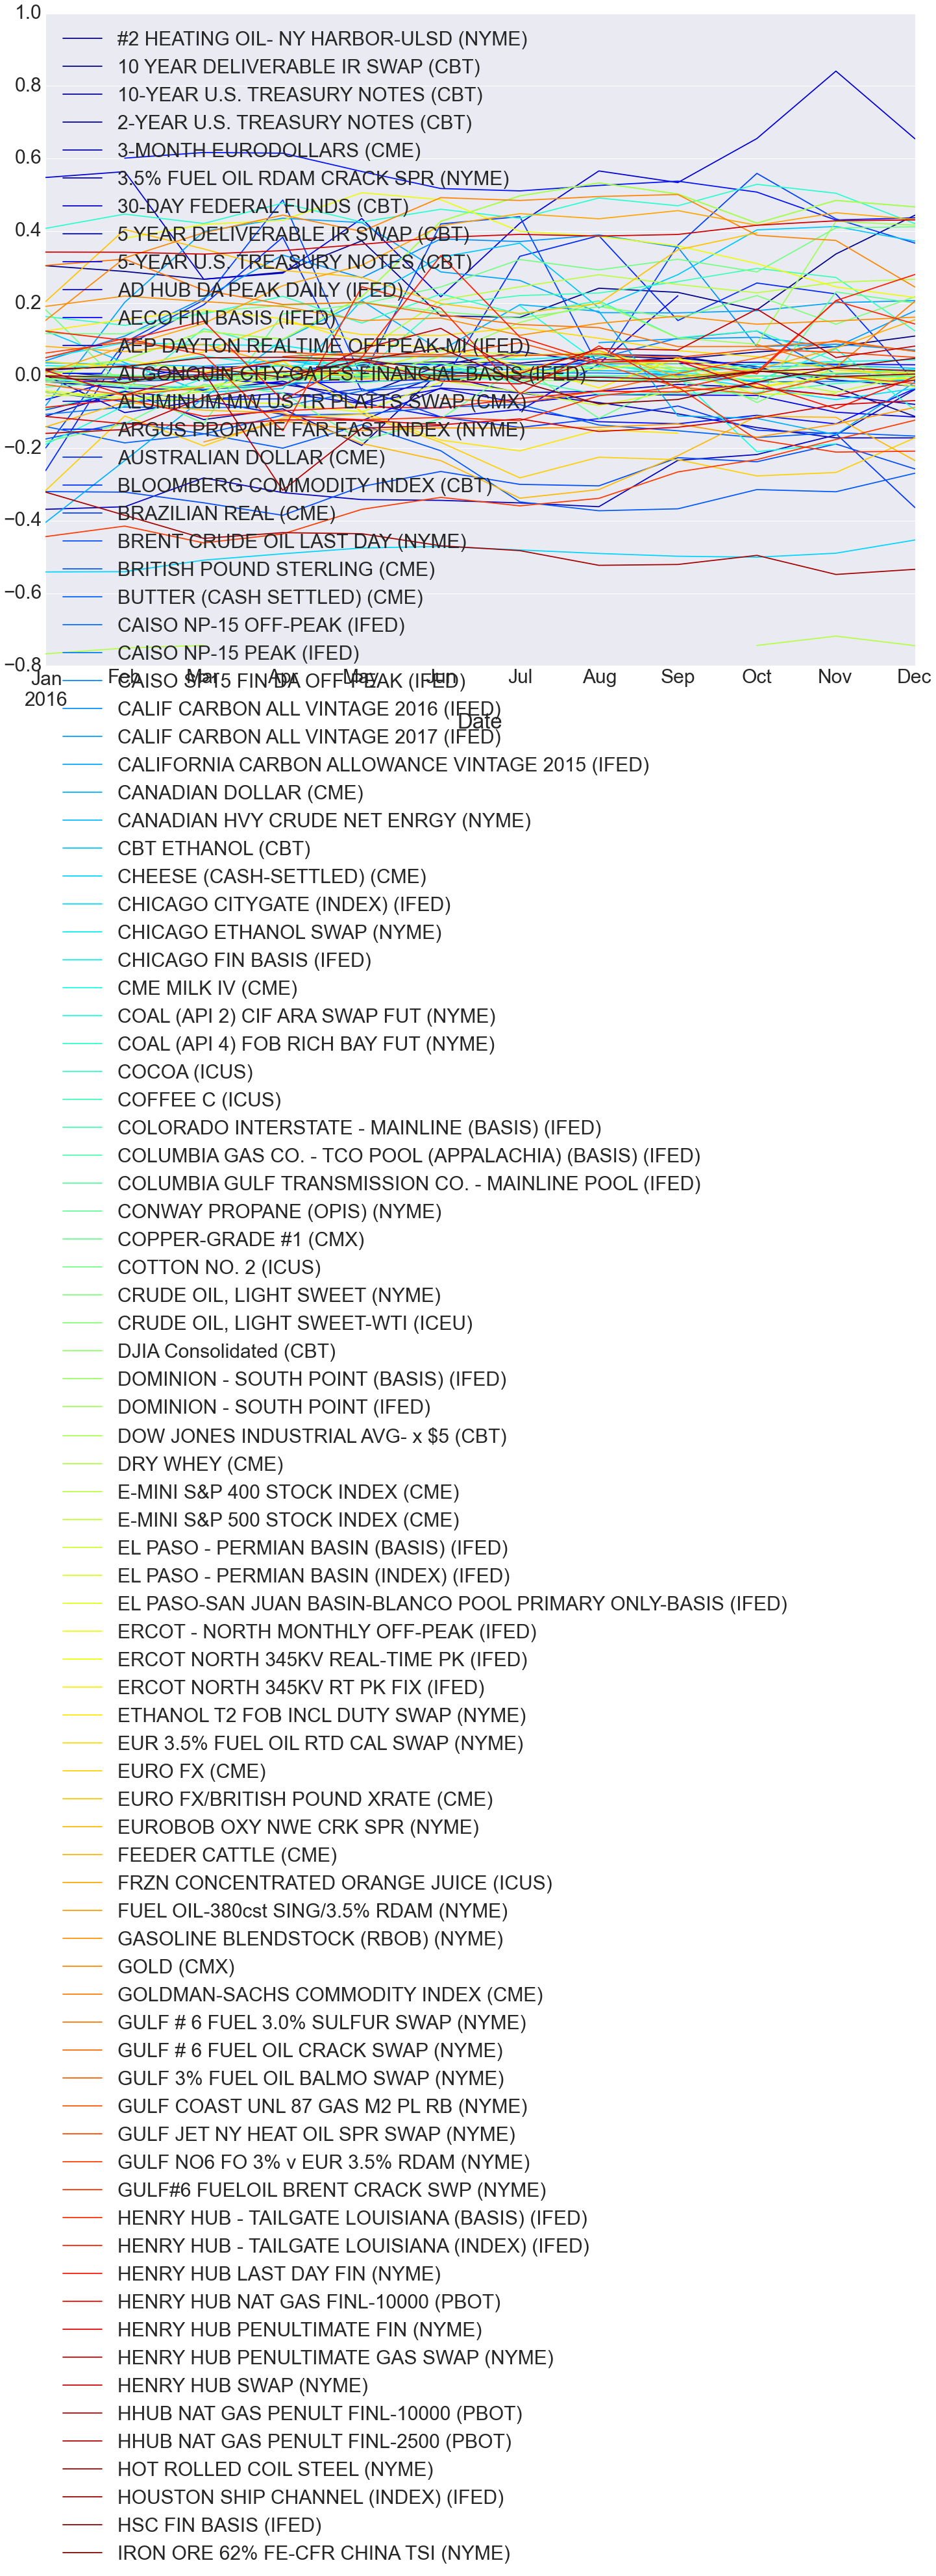

In [58]:
spec_ratio['2016'].resample(rule='m',how='last').dropna(axis=1,how='all').plot(colormap='jet')

In [61]:
spec_ratio.dropna(axis=1,how='all').to_csv('speculator_ratio.csv')

In [5]:
futures=pd.DataFrame()
futures['Longs']=COT_long.sum(axis=1)
futures['Shorts']=COT_short.sum(axis=1)
futures.resample(rule='m',how='last').plot(colormap='jet')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
(COT_OI).sum(axis=1).resample(rule='m',how='last').plot(colormap='jet')

In [ ]:
COT=pd.DataFrame()
for c in CME_contracts:
    ticker='CFTC/'+c+'_F_L_ALL'
    try:
        d=quandl.get(ticker,authtoken=token)
        x=(d['Noncommercial Long']-d['Noncommercial Short'])
        COT[map[c]]=x/(d['Open Interest'])
    except:
        print c

In [ ]:
COT.plot(colormap='jet')

In [ ]:
cleansed=load_amihud_markets_price()
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

In [ ]:
ind=amihud.dropna(how='all').index
mon=(COT.resample(rule='m',how='last')/COT.resample(rule='m',how='last').abs()).ix[ind]

In [ ]:
LG=pd.Series()
SH=pd.Series()
for r in mon.iterrows():
    LG[r[0]]=amihud[r[1][r[1]>0].index].ix[r[0]].dropna().median()
    SH[r[0]]=amihud[r[1][r[1]<0].index].ix[r[0]].dropna().median()
liquidity=pd.DataFrame()
liquidity['Speculators Long']=LG
liquidity['Speculators Short']=SH

In [ ]:
liquidity['2000':].plot(colormap='jet')

In [ ]:
raw=cleansed.resample(rule='m',how='last').pct_change()
LG=pd.Series()
SH=pd.Series()
for r in mon.iterrows():
    LG[r[0]]=raw[r[1][r[1]>0].index].ix[r[0]].dropna().shift(1).median()
    SH[r[0]]=raw[r[1][r[1]<0].index].ix[r[0]].dropna().shift(1).median()
returns=pd.DataFrame()
returns['Speculators Long']=LG
returns['Speculators Short']=SH

In [ ]:
returns.cumsum().plot(colormap='jet',title='Based on Monthly')

In [ ]:
ind=COT.index
raw=cleansed.ffill().ix[ind].pct_change()
LG=pd.Series()
SH=pd.Series()
for r in COT.iterrows():
    LG[r[0]]=raw[r[1][r[1]>0].index].ix[r[0]].dropna().shift(1).median()
    SH[r[0]]=raw[r[1][r[1]<0].index].ix[r[0]].dropna().shift(1).median()
rets=pd.DataFrame()
rets['Speculators Long']=LG
rets['Speculators Short']=SH

In [ ]:
rets.cumsum().plot(colormap='jet',title='Weekly Returns')

# Potential Idea

Rank and take the top half and see what the liquidity measure is through time.  Using something like portfolio sorts. However given the fact that the raw measure is not directly comparable I'm not sure it helps.






# Things to do

* Map contracts to my contracts and get returns